In [26]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from urllib.parse import quote_plus
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as font_manager

In [27]:
def crawl_naver_news(keywords, start_date, end_date):
    news_data = []
    base_url = "https://search.naver.com/search.naver"
    date_format = "%Y.%m.%d"
    
    for keyword in tqdm(keywords, desc="키워드별 진행"):
        current_start_date = start_date
        total_days = (end_date - start_date).days + 1
        for _ in tqdm(range(total_days), desc=f"{keyword} 뉴스 크롤링"):
            params = {
                'where': 'news',
                'query': keyword,
                'sm': 'tab_opt',
                'sort': '0',
                'photo': '0',
                'field': '0',
                'reporter_article': '',
                'pd': '3',
                'ds': current_start_date.strftime(date_format),
                'de': current_start_date.strftime(date_format),
                'docid': '',
                'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
                'start': 1,
            }
            
            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_items = soup.select('a.news_tit')
            
            for item in news_items:
                title = item.get('title')
                url = item.get('href')
                news_data.append({'keyword': keyword, 'title': title, 'url': url})

            time.sleep(3)
            current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

    return pd.DataFrame(news_data)

keywords = ["한국", "경제", "금융", "위기", "외국인", "미국"]
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2008-12-31")
df_news = crawl_naver_news(keywords, start_date, end_date)
print(df_news)

키워드별 진행:  83%|████████▎ | 5/6 [1:36:37<19:19, 1159.49s/it]


KeyboardInterrupt: 

In [ ]:
# def crawl_naver_news(keyword, start_date, end_date):
#     news_data = []
#     base_url = "https://search.naver.com/search.naver"
#     date_format = "%Y.%m.%d"
    
#     while start_date <= end_date:
#         params = {
#             'where': 'news',
#             'query': keyword,
#             'sm': 'tab_opt',
#             'sort': '0',
#             'photo': '0',
#             'field': '0',
#             'reporter_article': '',
#             'pd': '3',
#             'ds': start_date.strftime(date_format),
#             'de': start_date.strftime(date_format),
#             'docid': '',
#             'nso': 'so:r,p:from{}to{},a:all'.format(start_date.strftime("%Y%m%d"), start_date.strftime("%Y%m%d")),
#             'start': 1,
#         }
        
#         response = requests.get(base_url, params=params)
#         soup = BeautifulSoup(response.text, 'html.parser')
#         news_items = soup.select('a.news_tit')
        
#         for item in news_items:
#             title = item.get('title')
#             url = item.get('href')
#             news_data.append({'title': title, 'url': url})

#             time.sleep(5)
        
#         # 한 페이지에 모든 결과가 나올 것으로 예상되지만, 필요에 따라 페이지네이션을 처리하는 로직 추가 가능
#         start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

#     return pd.DataFrame(news_data)

# keyword = "경제, 금융, 위기"
# start_date = pd.to_datetime("2008-01-01")
# end_date = pd.to_datetime("2008-12-31")
# df_news = crawl_naver_news(keyword, start_date, end_date)
# print(df_news)

                                         title  \
0                    "위기오면 실력차 날것… 수익성 제고 승부수"   
1                 [2008 신년특집] 금융강국의 길 지주사에 달렸다   
2                    2008년 ITㆍ금융ㆍ건설 '新트로이카' 뜬다   
3          [2008 대예측-경제분야] 경제 리더십 발휘 성장엔진 재가동을   
4           <일문일답>權부총리 "한국경제 실적, 국민인식과 단절 아쉽다"   
5                      [세계경제 전망] 유럽 경제도 성장세 둔화   
6                         [시론]작은 정부와 금융감독체계 개편   
7           [해외석학 인터뷰] <1> 조지프 스티글리츠 美컬럼비아大 교수   
8               美달러 혼조..'07년 對유로 11%, 對엔 6.1%↓   
9           [2008 신년특집]발틱 3국- 년 6%성장 `흙 속의 진주`   
10                           국부펀드, 美 금융위기 막아낼것   
11                 [굿모닝 2008] 세계경제 향방은 미국에 달렸다   
12                         12월 무역, 57개월만에 첫 적자   
13                        윤증현·진동수 '李캠프 인수위' 참여   
14                       해외IB들 "3분기 800원대 재진입"   
15                             [신년사] 이장호 부산은행장   
16                   [글로벌 포커스] '올림픽의 해' 中 경제는…   
17                    한국경제연구원 "새정부 7% 경제성장 가능"   
18  [李당선인ㆍ경제硏 원장 토론회] 李당선인 "7% 성장 재정늘려 하진 않겠다"   


In [ ]:
# 데이터프레임을 CSV 파일로 저장
df_news.to_csv('/home/verlo/dev_ws/EDA/data/2008_naver_news.csv', index=False, encoding='utf-8-sig')

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2008_naver_news.csv', encoding='utf-8-sig')
df

,title,url
0,"""위기오면 실력차 날것… 수익성 제고 승부수""",http://www.moneytoday.co.kr/view/mtview.php?ty...
1,[2008 신년특집] 금융강국의 길 지주사에 달렸다,http://www.fnnews.com/view?ra=Sent0701m_01A&co...
2,2008년 ITㆍ금융ㆍ건설 '新트로이카' 뜬다,http://www.hankyung.com/news/app/newsview.php?...
3,[2008 대예측-경제분야] 경제 리더십 발휘 성장엔진 재가동을,http://www.heraldbiz.com/SITE/data/html_dir/20...
4,"<일문일답>權부총리 ""한국경제 실적, 국민인식과 단절 아쉽다""",https://n.news.naver.com/mnews/article/003/000...
5,[세계경제 전망] 유럽 경제도 성장세 둔화,http://news.mk.co.kr/news_forward.php?no=419&y...
6,[시론]작은 정부와 금융감독체계 개편,http://www.moneytoday.co.kr/view/mtview.php?ty...
7,[해외석학 인터뷰] <1> 조지프 스티글리츠 美컬럼비아大 교수,https://n.news.naver.com/mnews/article/011/000...
8,"美달러 혼조..'07년 對유로 11%, 對엔 6.1%↓",http://www.newspim.com/sub_view.php?cate1=4&ca...
9,[2008 신년특집]발틱 3국- 년 6%성장 `흙 속의 진주`,http://www.etnews.co.kr/news/detail.html?id=20...


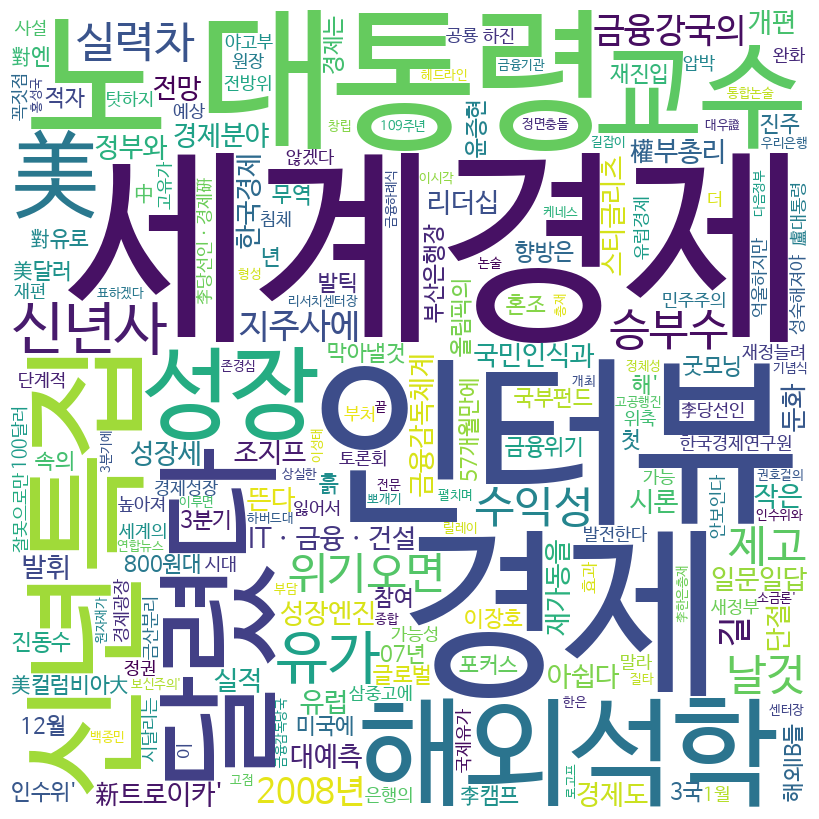

In [ ]:
# CSV 파일 읽기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2008_naver_news.csv', encoding='utf-8-sig')

# 워드 클라우드를 생성할 열 선택
text = ' '.join(df['title'].dropna())  # 'your_column'을 실제 열 이름으로 변경하세요.

# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경하세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path=font_path).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()